In [1]:
# pip install matplotlib seaborn

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns


### Carregando os dados no notebook

In [7]:
# Abrir o JSON
with open('US_category_id.json', encoding='utf-8') as f:
    categorias = json.load(f)

# Extrair o nome das categorias
cat_list = categorias['items']
df_cat = pd.DataFrame([{
    'category_id': int(item['id']),
    'category_name': item['snippet']['title']
} for item in cat_list])

# Carregando o CSV (faça upload do arquivo antes)
df = pd.read_csv("/Users/ingridsabino/Documents/PortfolioDados/youtube_trending_videos/USvideos.csv", encoding='utf-8')

# Juntar com os nomes de categoria
df = df.merge(df_cat, on='category_id', how='left')

# Usar 'category_name' diretamente!
df[['title', 'category_name', 'views']].head()

# Visualizar primeiras linhas
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


### Tratamento de dados

In [8]:
# Ver info básica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
# Ver valores nulos
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               4224
category_name              252
dtype: int64

In [9]:
# Converter a data de trending
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

In [10]:
# Remover duplicatas
df.drop_duplicates(inplace=True)

## Análise exploratória


### Categorias mais populares 

Text(0.5, 1.0, 'Categorias mais frequentes')

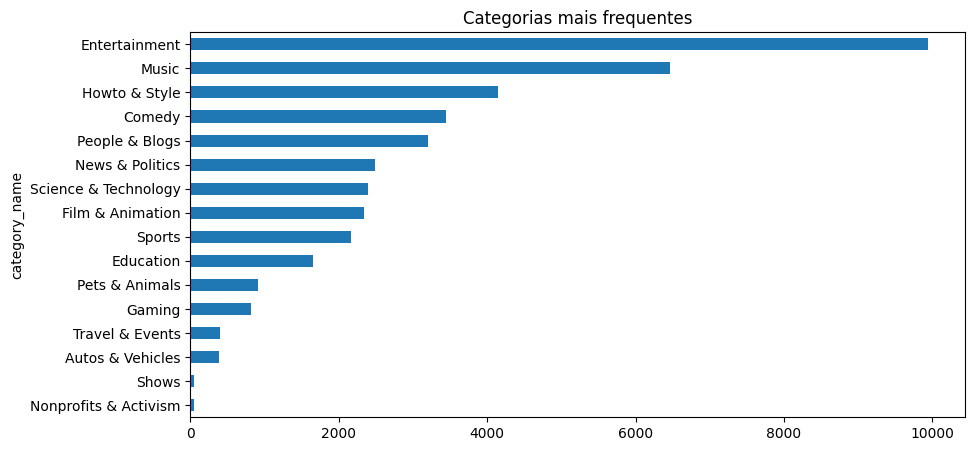

In [11]:
# df['category_name'].value_counts()
df['category_name'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 5)).set_title('Categorias mais frequentes')

### Videos com mais visualizaçao

In [16]:
top_views = df.sort_values(by='views', ascending=False).head(10)
top_views[['title','channel_title', 'views']]#.groupby('channel_title')['views'].sum().reset_index().sort_values(by='views', ascending=False)

,title,channel_title,views
38547,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,225211923
38345,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,220490543
38146,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,217750076
37935,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,210338856
37730,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,205643016
37531,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,200820941
37333,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,196222618
37123,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,190950401
36913,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,184446490
36710,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,179045286


### Correlação entre likes, views e comentários

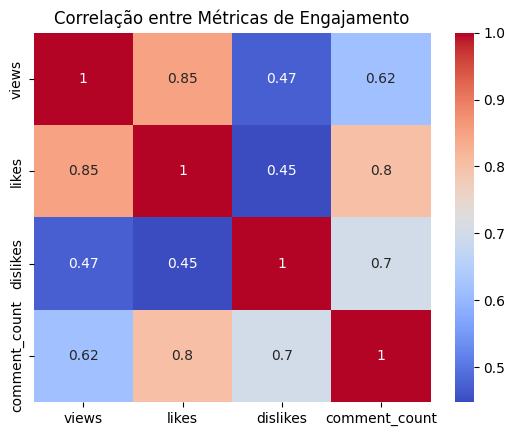

In [17]:

sns.heatmap(df[['views', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre Métricas de Engajamento")
plt.show()

### Engajamento por categoria

In [18]:
# Criando uma métrica de engajamento: likes + comentários / views
df['engajamento'] = (df['likes'] + df['comment_count']) / df['views']

df.groupby('category_name')['engajamento'].mean().sort_values(ascending=False).head(10)
# df.groupby('category_name')['engajamento'].mean().sort_values(ascending=False).head(10).plot(kind='line', figsize=(10, 5)).set_title('Categorias mais frequentes')


category_name
Music                    0.051430
Howto & Style            0.050873
Comedy                   0.049084
People & Blogs           0.046630
Nonprofits & Activism    0.045210
Gaming                   0.044788
Education                0.042277
Pets & Animals           0.037486
Science & Technology     0.034762
Entertainment            0.032432
Name: engajamento, dtype: float64